# 🏥 Análise Lixo Hospitalar 

## 📚 Importando bibliotecas que serão utilizadas

In [451]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

## 📖 Lendo o arquivo csv
- Importando e lendo os arquivos

In [452]:
HOSPITAL_TRASH_RECORD_DATA_PATH = glob.glob('data/*.csv')
hospital_trash_df = [pd.read_csv(file_path) for file_path in HOSPITAL_TRASH_RECORD_DATA_PATH]

## 🫧 Limpeza dos Dados
1. Removendo linhas indesejadas
2. Organizando as colunas 
3. Tratando os dados ausentes 
4. Corrigindo os tipos de dados

### 1. Removendo linhas indesejadas
- Analisando se todas possuem a palavra 'Nutrição' ou 'NUTRIÇÃO'
- Removendo as primeiras linhas até a palavra 'Nutrição' ou 'NUTRIÇÃO'

In [453]:
keyword = 'NÃO RECICLÁVEL' 
def verify_word_in_column(list_dataframe_for_keyword, keyword) -> bool:  
    list_dataframe_as_string = list_dataframe_for_keyword.to_string()
    if keyword in list_dataframe_as_string: 
        return True
    return False
    
all(verify_word_in_column(list_dataframe_for_keyword, keyword) for list_dataframe_for_keyword in hospital_trash_df)

True

In [454]:
def delete_rows_unwanted(list_dataframe_for_delete_rows, keyword): 
    for index, row in list_dataframe_for_delete_rows.iterrows():
        if any(keyword in str(valor) for valor in row):
            return list_dataframe_for_delete_rows.iloc[index+1:]
    return list_dataframe_for_delete_rows

hospital_trash_df = [delete_rows_unwanted(list_dataframe_for_delete_rows, keyword) for list_dataframe_for_delete_rows in hospital_trash_df]     

### 2. Organização de colunas
- Concatenando os dataframes usando números para simbolizar cada mês
- Renomeando colunas para nomes descritivos

In [455]:
hospital_trash_df = pd.concat(hospital_trash_df, keys=['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
    '2021-01', '2021-02', '2021-03', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
    '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-12' ,
    '2023-01',  '2023-02'], verify_integrity=True)
hospital_trash_df

CONTROLE DIÁRIO DE PRODUÇÃO DE LIXO Unnamed: 1  Unnamed: 2  \
2020-01 4                        Administração        NaN         NaN   
        5                          Ambulatório        NaN         NaN   
        6                                Áreas        NaN         NaN   
        7                                Bloco        NaN         NaN   
        8                                  CCA        NaN         NaN   
...                                        ...        ...         ...   
2023-02 18                         Obstetrícia        NaN         NaN   
        19                           Pediatria     19.00          NaN   
        20                                 SAI        NaN         NaN   
        21                                 UTI     20.00         20.0   
        22                               TOTAL    274.00          NaN   

            Unnamed: 3  Unnamed: 4 Unnamed: 5 Unnamed: 6  Unnamed: 7  \
2020-01 4          NaN         NaN        NaN        NaN         NaN   
        5          NaN         NaN        NaN        NaN         NaN   
        6          NaN         NaN        NaN        NaN         NaN   
        7          NaN         NaN        NaN        NaN         NaN   
        8          NaN         NaN        NaN        NaN         NaN   
...                ...         ...        ...        ...         ...   
2023-02 18         NaN         NaN        NaN        NaN         NaN   
        19         NaN         NaN        NaN        NaN         NaN   
        20         NaN         NaN        NaN        NaN         NaN   
        21         NaN         NaN        NaN        NaN         NaN   
        22         NaN         NaN       -           NaN         NaN   

           Unnamed: 8  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12  \
2020-01 4         NaN         NaN         NaN         NaN         NaN   
        5         NaN         NaN         NaN         NaN         NaN   
        6         NaN         NaN         NaN         NaN         NaN   
        7         NaN         NaN         NaN         NaN         NaN   
        8         NaN         NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
2023-02 18        NaN         NaN         NaN         NaN         NaN   
        19        NaN         NaN         NaN         NaN         NaN   
        20        NaN         NaN         NaN         NaN         NaN   
        21        NaN         NaN         NaN         NaN         NaN   
        22       -            NaN        -            NaN        -      

           Unnamed: 13  
2020-01 4          NaN  
        5          NaN  
        6          NaN  
        7          NaN  
        8          NaN  
...                ...  
2023-02 18         NaN  
        19         NaN  
        20         NaN  
        21         NaN  
        22         NaN  

[700 rows x 14 columns]

In [456]:
new_names_columns = ['SETOR',
                    'Classe_D-Nao_Reciclavel','Classe_D-Nao_Reciclavel', 'Classe_D-Nao_Reciclavel', 'Classe_D-Nao_Reciclavel',
                    'Classe_D-Reciclavel','Classe_D-Reciclavel','Classe_D-Reciclavel', 
                    'Classe_A(Infectante)', 'Classe_A(Infectante)', 
                    'Classe_E(Perfuro_Cortante)', 'Classe_E(Perfuro_Cortante)', 
                    'Classe_B(Medicamentos)', 'Classe_B(Medicamentos)']

hospital_trash_df.columns = new_names_columns
hospital_trash_df

SETOR  Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
2020-01 4   Administração                      NaN                      NaN   
        5     Ambulatório                      NaN                      NaN   
        6           Áreas                      NaN                      NaN   
        7           Bloco                      NaN                      NaN   
        8             CCA                      NaN                      NaN   
...                   ...                      ...                      ...   
2023-02 18    Obstetrícia                      NaN                      NaN   
        19      Pediatria                   19.00                       NaN   
        20            SAI                      NaN                      NaN   
        21            UTI                   20.00                      20.0   
        22          TOTAL                  274.00                       NaN   

            Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
2020-01 4                       NaN                      NaN   
        5                       NaN                      NaN   
        6                       NaN                      NaN   
        7                       NaN                      NaN   
        8                       NaN                      NaN   
...                             ...                      ...   
2023-02 18                      NaN                      NaN   
        19                      NaN                      NaN   
        20                      NaN                      NaN   
        21                      NaN                      NaN   
        22                      NaN                      NaN   

            Classe_D-Reciclavel  Classe_D-Reciclavel  Classe_D-Reciclavel  \
2020-01 4                   NaN                  NaN                  NaN   
        5                   NaN                  NaN                  NaN   
        6                   NaN                  NaN                  NaN   
        7                   NaN                  NaN                  NaN   
        8                   NaN                  NaN                  NaN   
...                         ...                  ...                  ...   
2023-02 18                  NaN                  NaN                  NaN   
        19                  NaN                  NaN                  NaN   
        20                  NaN                  NaN                  NaN   
        21                  NaN                  NaN                  NaN   
        22                 -                     NaN                  NaN   

            Classe_A(Infectante)  Classe_A(Infectante)  \
2020-01 4                    NaN                   NaN   
        5                    NaN                   NaN   
        6                    NaN                   NaN   
        7                    NaN                   NaN   
        8                    NaN                   NaN   
...                          ...                   ...   
2023-02 18                   NaN                   NaN   
        19                   NaN                   NaN   
        20                   NaN                   NaN   
        21                   NaN                   NaN   
        22                  -                      NaN   

           Classe_E(Perfuro_Cortante) Classe_E(Perfuro_Cortante)  \
2020-01 4                         NaN                        NaN   
        5                         NaN                        NaN   
        6                         NaN                        NaN   
        7                         NaN                        NaN   
        8                         NaN                        NaN   
...                               ...                        ...   
2023-02 18                        NaN                        NaN   
        19                        NaN                        NaN   
        20                        NaN                        NaN   


### 3. Tratamento de Dados Ausentes
- Identificando dados ausentes

In [457]:
hospital_trash_df.isnull().sum()

SETOR                          55
Classe_D-Nao_Reciclavel       241
Classe_D-Nao_Reciclavel       670
Classe_D-Nao_Reciclavel       700
Classe_D-Nao_Reciclavel       700
Classe_D-Reciclavel           616
Classe_D-Reciclavel           643
Classe_D-Reciclavel           699
Classe_A(Infectante)          330
Classe_A(Infectante)          684
Classe_E(Perfuro_Cortante)    640
Classe_E(Perfuro_Cortante)    677
Classe_B(Medicamentos)        676
Classe_B(Medicamentos)        688
dtype: int64

In [458]:
hospital_trash_df.isnull()

SETOR  Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
2020-01 4   False                     True                     True   
        5   False                     True                     True   
        6   False                     True                     True   
        7   False                     True                     True   
        8   False                     True                     True   
...           ...                      ...                      ...   
2023-02 18  False                     True                     True   
        19  False                    False                     True   
        20  False                     True                     True   
        21  False                    False                    False   
        22  False                    False                     True   

            Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
2020-01 4                      True                     True   
        5                      True                     True   
        6                      True                     True   
        7                      True                     True   
        8                      True                     True   
...                             ...                      ...   
2023-02 18                     True                     True   
        19                     True                     True   
        20                     True                     True   
        21                     True                     True   
        22                     True                     True   

            Classe_D-Reciclavel  Classe_D-Reciclavel  Classe_D-Reciclavel  \
2020-01 4                  True                 True                 True   
        5                  True                 True                 True   
        6                  True                 True                 True   
        7                  True                 True                 True   
        8                  True                 True                 True   
...                         ...                  ...                  ...   
2023-02 18                 True                 True                 True   
        19                 True                 True                 True   
        20                 True                 True                 True   
        21                 True                 True                 True   
        22                False                 True                 True   

            Classe_A(Infectante)  Classe_A(Infectante)  \
2020-01 4                   True                  True   
        5                   True                  True   
        6                   True                  True   
        7                   True                  True   
        8                   True                  True   
...                          ...                   ...   
2023-02 18                  True                  True   
        19                  True                  True   
        20                  True                  True   
        21                  True                  True   
        22                 False                  True   

            Classe_E(Perfuro_Cortante)  Classe_E(Perfuro_Cortante)  \
2020-01 4                         True                        True   
        5                         True                        True   
        6                         True                        True   
        7                         True                        True   
        8                         True                        True   
...                                ...                         ...   
2023-02 18                        True                        True   
        19                        True                        True   
        20                        True                        True   
        21                        True                        True  

### 4. Identificação dos Tipos de Dados
- Identificando o tipo de dados de cada coluna
- Convertendo o tipo de dados para numéricos em quase todas as colunas

In [459]:
hospital_trash_df.dtypes

SETOR                          object
Classe_D-Nao_Reciclavel        object
Classe_D-Nao_Reciclavel       float64
Classe_D-Nao_Reciclavel       float64
Classe_D-Nao_Reciclavel       float64
Classe_D-Reciclavel            object
Classe_D-Reciclavel            object
Classe_D-Reciclavel           float64
Classe_A(Infectante)           object
Classe_A(Infectante)          float64
Classe_E(Perfuro_Cortante)     object
Classe_E(Perfuro_Cortante)     object
Classe_B(Medicamentos)         object
Classe_B(Medicamentos)         object
dtype: object

In [460]:
column_for_convert = hospital_trash_df.columns.drop('SETOR')
for column in column_for_convert:
    hospital_trash_df[column] = hospital_trash_df[column].apply(pd.to_numeric, errors='coerce')
    
hospital_trash_df.dtypes

SETOR                          object
Classe_D-Nao_Reciclavel       float64
Classe_D-Nao_Reciclavel       float64
Classe_D-Nao_Reciclavel       float64
Classe_D-Nao_Reciclavel       float64
Classe_D-Reciclavel           float64
Classe_D-Reciclavel           float64
Classe_D-Reciclavel           float64
Classe_A(Infectante)          float64
Classe_A(Infectante)          float64
Classe_E(Perfuro_Cortante)    float64
Classe_E(Perfuro_Cortante)    float64
Classe_B(Medicamentos)        float64
Classe_B(Medicamentos)        float64
dtype: object

## 📈 Séries Temporais
1. Aprimorando o DataFrame
2. Trabalhando com datas
3. Selecionando os valores

### 1. Aprimorando o DataFrame
- Resetando os indexes
- Nomeando a coluna dos meses 

In [461]:
hospital_trash_df = hospital_trash_df.reset_index()
hospital_trash_df

,level_0,level_1,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A(Infectante),Classe_A(Infectante),Classe_E(Perfuro_Cortante),Classe_E(Perfuro_Cortante),Classe_B(Medicamentos),Classe_B(Medicamentos)
0,2020-01,4,Administração,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01,5,Ambulatório,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01,6,Áreas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01,7,Bloco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01,8,CCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2023-02,18,Obstetrícia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,2023-02,19,Pediatria,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,2023-02,20,SAI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,2023-02,21,UTI,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [462]:
hospital_trash_df = hospital_trash_df.rename(columns={'level_0': 'Mes'}).drop('level_1', axis=1)
hospital_trash_df

,Mes,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A(Infectante),Classe_A(Infectante),Classe_E(Perfuro_Cortante),Classe_E(Perfuro_Cortante),Classe_B(Medicamentos),Classe_B(Medicamentos)
0,2020-01,Administração,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01,Ambulatório,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01,Áreas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01,Bloco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01,CCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2023-02,Obstetrícia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,2023-02,Pediatria,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,2023-02,SAI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,2023-02,UTI,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Trabalhando com datas 
- Analisando o tipo de cada coluna
- Mudando a coluna `Mes` para o tipo `datetime` para elaboração das séries temporais
- Tranformando a coluna `Mes` para uma coluna indexada

In [463]:
hospital_trash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mes                         700 non-null    object 
 1   SETOR                       645 non-null    object 
 2   Classe_D-Nao_Reciclavel     453 non-null    float64
 3   Classe_D-Nao_Reciclavel     30 non-null     float64
 4   Classe_D-Nao_Reciclavel     0 non-null      float64
 5   Classe_D-Nao_Reciclavel     0 non-null      float64
 6   Classe_D-Reciclavel         67 non-null     float64
 7   Classe_D-Reciclavel         51 non-null     float64
 8   Classe_D-Reciclavel         1 non-null      float64
 9   Classe_A(Infectante)        361 non-null    float64
 10  Classe_A(Infectante)        16 non-null     float64
 11  Classe_E(Perfuro_Cortante)  44 non-null     float64
 12  Classe_E(Perfuro_Cortante)  16 non-null     float64
 13  Classe_B(Medicamentos)      2 non-n

In [464]:
hospital_trash_df.Mes = pd.to_datetime(hospital_trash_df.Mes)
hospital_trash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Mes                         700 non-null    datetime64[ns]
 1   SETOR                       645 non-null    object        
 2   Classe_D-Nao_Reciclavel     453 non-null    float64       
 3   Classe_D-Nao_Reciclavel     30 non-null     float64       
 4   Classe_D-Nao_Reciclavel     0 non-null      float64       
 5   Classe_D-Nao_Reciclavel     0 non-null      float64       
 6   Classe_D-Reciclavel         67 non-null     float64       
 7   Classe_D-Reciclavel         51 non-null     float64       
 8   Classe_D-Reciclavel         1 non-null      float64       
 9   Classe_A(Infectante)        361 non-null    float64       
 10  Classe_A(Infectante)        16 non-null     float64       
 11  Classe_E(Perfuro_Cortante)  44 non-null     float64       

In [465]:
hospital_trash_df.set_index('Mes', inplace=True)
hospital_trash_df

,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A(Infectante),Classe_A(Infectante),Classe_E(Perfuro_Cortante),Classe_E(Perfuro_Cortante),Classe_B(Medicamentos),Classe_B(Medicamentos)
Mes,,,,,,,,,,,,,,
2020-01-01,Administração,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,Ambulatório,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,Áreas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,Bloco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,CCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,Obstetrícia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,Pediatria,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,SAI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Selecionando os valores
- Separando a última linha de cada mês pois é a que possui o `total` 
- Criando dataframes correspondentes a cada ano
- Plotando a série temporal de cada ano

In [466]:
last_line_month_df = hospital_trash_df.groupby('Mes').last()
last_line_month_df

,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A(Infectante),Classe_A(Infectante),Classe_E(Perfuro_Cortante),Classe_E(Perfuro_Cortante),Classe_B(Medicamentos),Classe_B(Medicamentos)
Mes,,,,,,,,,,,,,,
2020-01-01,TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,TOTAL,451.20,NaN,NaN,NaN,NaN,37.00,NaN,122.40,NaN,NaN,28.55,NaN,NaN
2020-03-01,TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-01,TOTAL,476.50,NaN,NaN,NaN,NaN,54.50,NaN,120.55,NaN,NaN,NaN,NaN,NaN
2020-06-01,TOTAL,886.48,NaN,NaN,NaN,NaN,NaN,NaN,228.25,0.45,NaN,9.90,NaN,NaN
2020-07-01,TOTAL,912.40,99.18,NaN,NaN,NaN,NaN,NaN,143.20,NaN,2.05,NaN,NaN,NaN
2020-08-01,TOTAL,404.75,5.15,NaN,NaN,NaN,64.05,2.15,241.00,NaN,2.20,NaN,NaN,NaN
2020-09-01,TOTAL,808.12,29.96,NaN,NaN,NaN,NaN,NaN,134.10,9.20,1.45,NaN,NaN,NaN


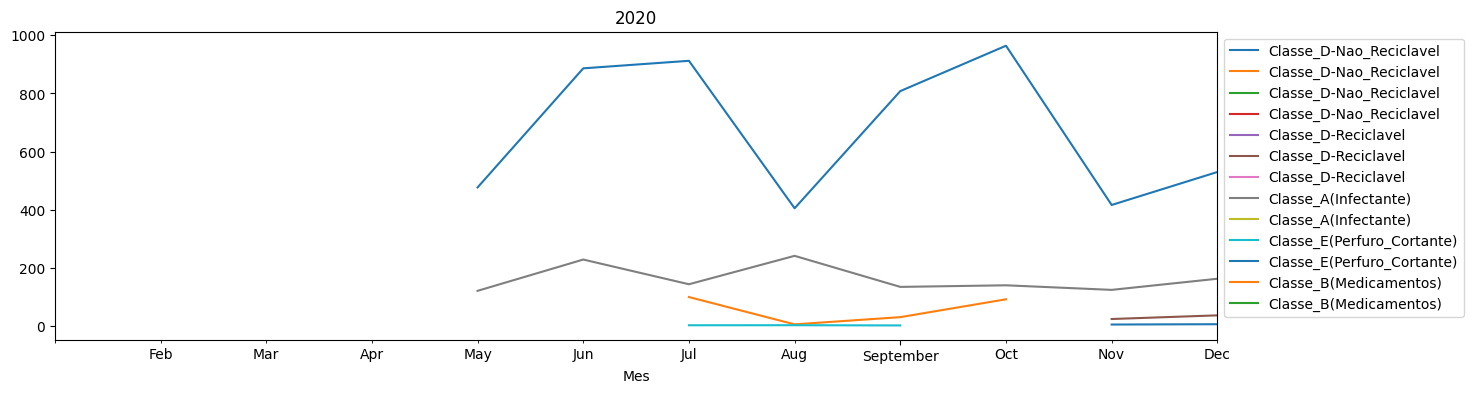

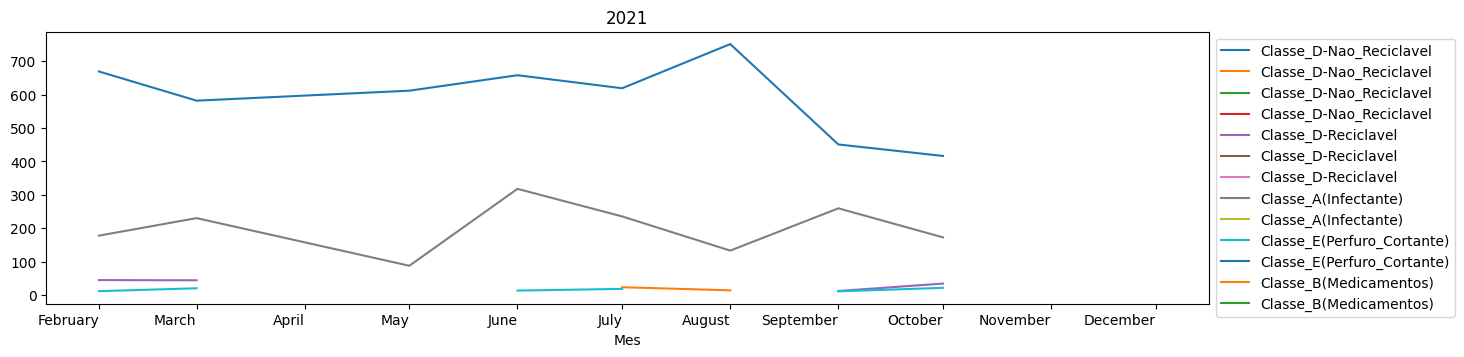

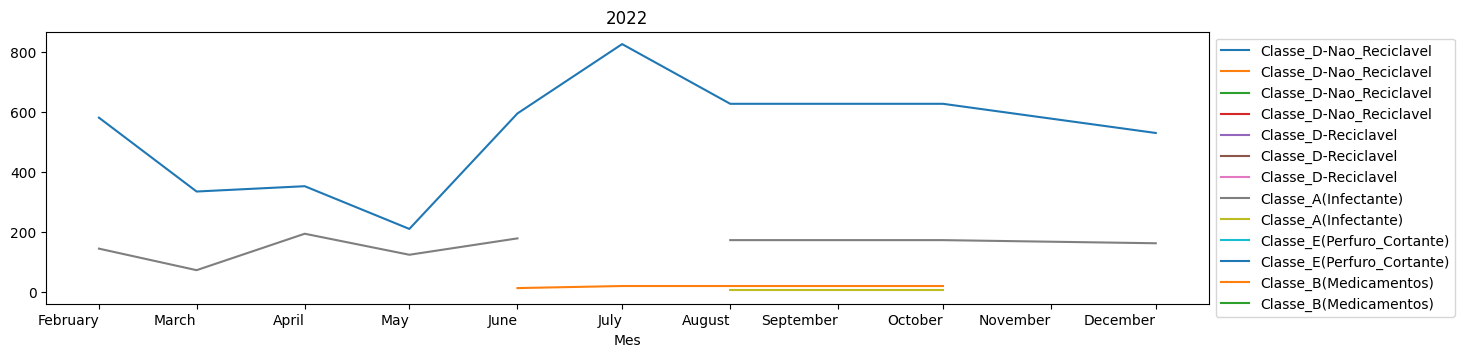

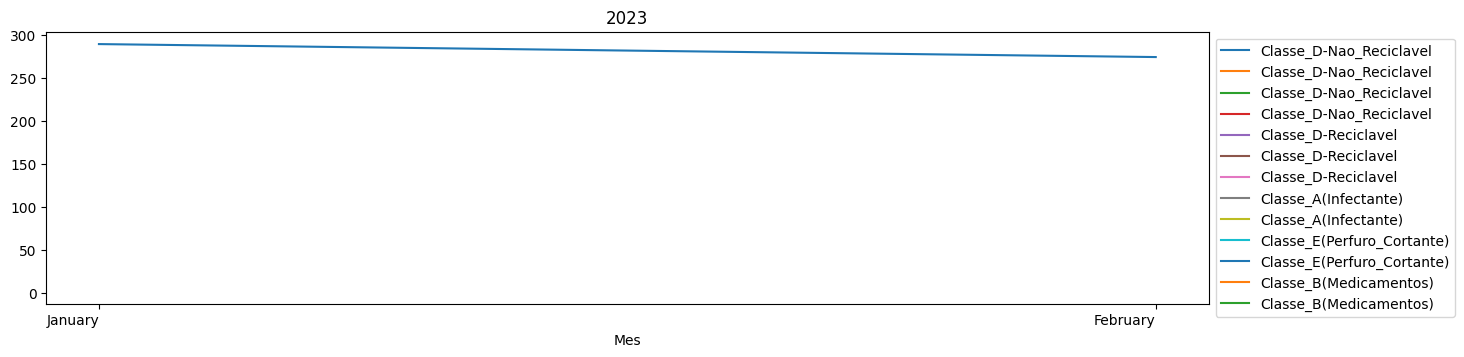

In [467]:
def plot_df_year(df, year):
    ax = df.plot(figsize=(15, 4), title=f'{year}')
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
    plt.xticks(rotation=0) 
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    
df_years = {year: group for year, group in last_line_month_df.groupby(last_line_month_df.index.year)}
df_per_year = {
    2020: df_years[2020],
    2021: df_years[2021],
    2022: df_years[2022],
    2023: df_years[2023]
}

for year, df in df_per_year.items():
    plot_df_year(df, year)